<a href="https://colab.research.google.com/github/g-tumwesigye/web_scraping_assignment/blob/main/web_scraping_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import os

In [ ]:
#Open Weather API
API_KEY = '21c4056a247145f2f1cb6b6748999e81'
URL: "http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"


In [ ]:
#Fetch the data........

API_KEY = '21c4056a247145f2f1cb6b6748999e81'
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'
CITIES = [
    'London', 'New York', 'Tokyo', 'Sydney', 'Paris', 'Berlin', 'Moscow', 'Beijing', 'Delhi', 'Bangkok',
    'Dubai', 'Istanbul', 'Cairo', 'Lagos', 'Johannesburg', 'Buenos Aires', 'Sao Paulo', 'Mexico City',
    'Los Angeles', 'Chicago', 'Toronto', 'Vancouver', 'Miami', 'San Francisco', 'Washington D.C.', 'Houston',
    'Atlanta', 'Boston', 'Seattle', 'Dallas', 'Philadelphia', 'Phoenix', 'San Diego', 'Denver', 'Montreal',
    'Madrid', 'Rome', 'Vienna', 'Zurich', 'Amsterdam', 'Brussels', 'Copenhagen', 'Oslo', 'Stockholm', 'Helsinki',
    'Warsaw', 'Prague', 'Budapest', 'Athens', 'Lisbon', 'Dublin', 'Barcelona', 'Milan', 'Munich', 'Frankfurt',
    'Hamburg', 'Cologne', 'Stuttgart', 'Dusseldorf', 'Leipzig', 'Dortmund', 'Essen', 'Bremen', 'Dresden', 'Hanover'
]

def fetch_weather_data(city, api_key=API_KEY):
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric'
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    if response.status_code == 200:
        return data
    else:
        print(f"Failed to fetch data for {city}: {data.get('message', 'Unknown error')}")
        return None

def parse_weather_data(data):
    weather = {
        'city': data['name'],
        'temperature': data['main']['temp'],
        'humidity': data['main']['humidity'],
        'pressure': data['main']['pressure'],
        'visibility': data.get('visibility', None),
        'cloudiness': data['clouds']['all'],
        'wind_speed': data['wind']['speed'],
        'description': data['weather'][0]['description'],
        'date': datetime.datetime.now()
    }
    return weather

def save_to_csv(data, filename='weather_data.csv'):
    df = pd.DataFrame([data])
    df.to_csv(filename, mode='a', header=not os.path.exists(filename), index=False)

if __name__ == '__main__':
    for city in CITIES:
        weather_data = fetch_weather_data(city)
        if weather_data:
            parsed_data = parse_weather_data(weather_data)
            save_to_csv(parsed_data)
            print(f"Weather data for {city} saved to CSV.")

Weather data for London saved to CSV.
Weather data for New York saved to CSV.
Weather data for Tokyo saved to CSV.
Weather data for Sydney saved to CSV.
Weather data for Paris saved to CSV.
Weather data for Berlin saved to CSV.
Weather data for Moscow saved to CSV.
Weather data for Beijing saved to CSV.
Weather data for Delhi saved to CSV.
Weather data for Bangkok saved to CSV.
Weather data for Dubai saved to CSV.
Weather data for Istanbul saved to CSV.
Weather data for Cairo saved to CSV.
Weather data for Lagos saved to CSV.
Weather data for Johannesburg saved to CSV.
Weather data for Buenos Aires saved to CSV.
Weather data for Sao Paulo saved to CSV.
Weather data for Mexico City saved to CSV.
Weather data for Los Angeles saved to CSV.
Weather data for Chicago saved to CSV.
Weather data for Toronto saved to CSV.
Weather data for Vancouver saved to CSV.
Weather data for Miami saved to CSV.
Weather data for San Francisco saved to CSV.
Weather data for Washington D.C. saved to CSV.
Weath

<ipython-input-4-1d653efe5632>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="city", y="temperature", data=df, palette="coolwarm")


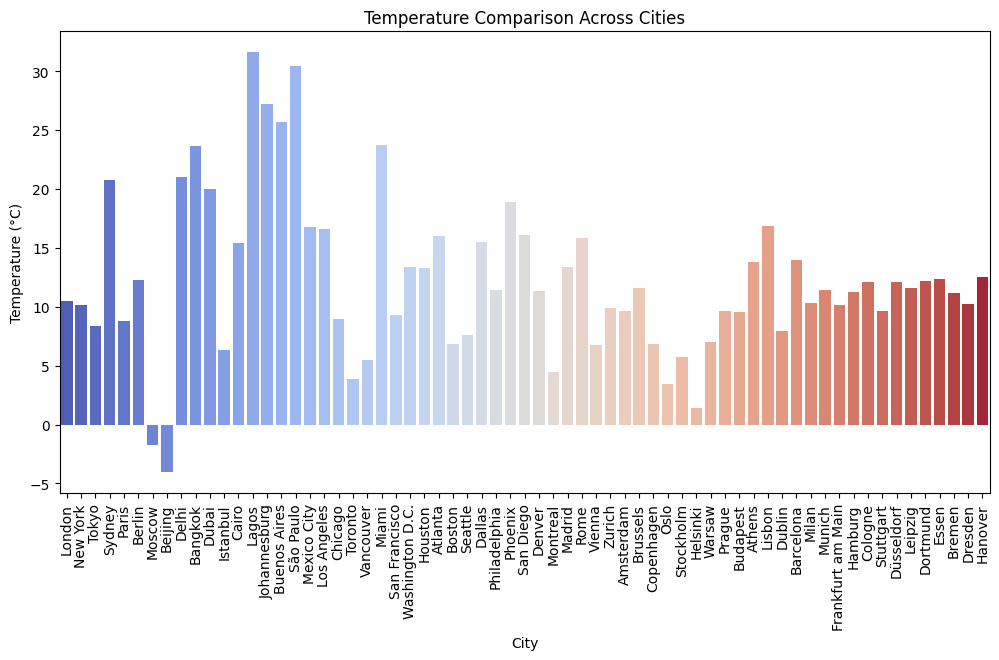

<ipython-input-4-1d653efe5632>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="city", y="humidity", data=df, palette="Blues")


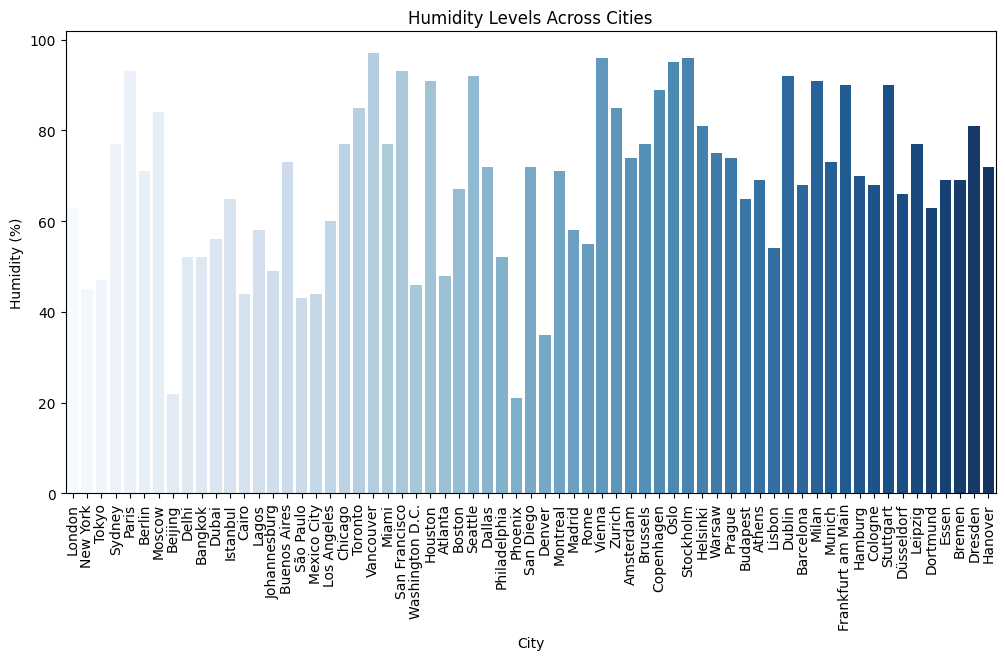

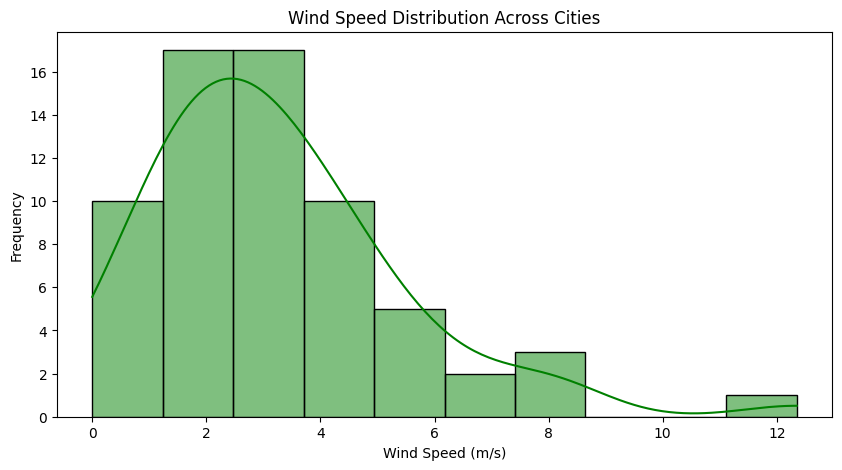

<ipython-input-4-1d653efe5632>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="city", y="cloudiness", data=df, palette="gray")


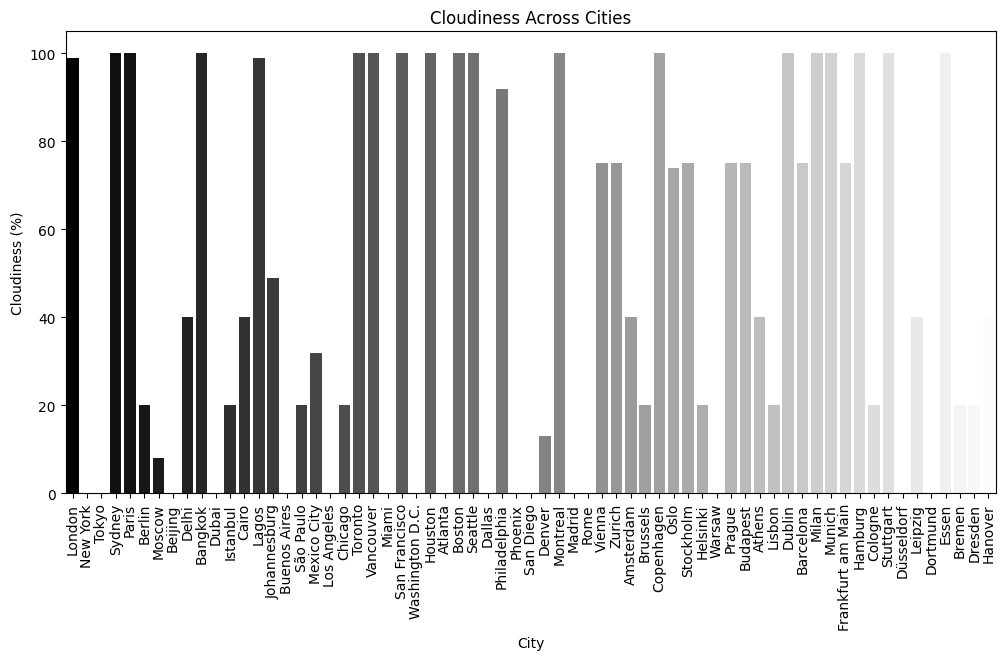

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load cleaned weather data
df = pd.read_csv("/content/weather_data.csv")

# Temperature Comparison Across Cities
plt.figure(figsize=(12, 6))
sns.barplot(x="city", y="temperature", data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Temperature Comparison Across Cities")
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.show()

# Humidity Levels Across Cities
plt.figure(figsize=(12, 6))
sns.barplot(x="city", y="humidity", data=df, palette="Blues")
plt.xticks(rotation=90)
plt.title("Humidity Levels Across Cities")
plt.xlabel("City")
plt.ylabel("Humidity (%)")
plt.show()

# Wind Speed Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["wind_speed"], bins=10, kde=True, color="green")
plt.title("Wind Speed Distribution Across Cities")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

# Cloudiness Across Cities
plt.figure(figsize=(12, 6))
sns.barplot(x="city", y="cloudiness", data=df, palette="gray")
plt.xticks(rotation=90)
plt.title("Cloudiness Across Cities")
plt.xlabel("City")
plt.ylabel("Cloudiness (%)")
plt.show()
